# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Basic Data Analysis

In [2]:
df = pd.read_csv('combined_data.csv')
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
df.shape

(83448, 2)

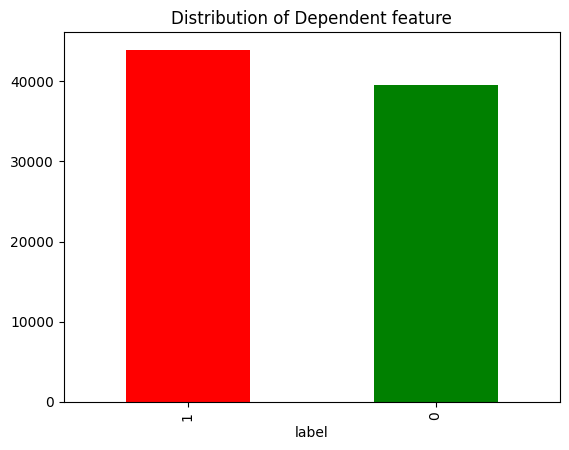

In [5]:
freq = df["label"].value_counts()
freq.plot(kind= 'bar', color= ["red", "green"])
plt.title('Distribution of Dependent feature')
plt.show()

# Spam and Not-Spam word analysis

### Stop word removal

In [8]:
import re, nltk

nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_tokenized_sentence(s):    
    cleaned_s = []
    words = nltk.word_tokenize(s)
    for word in words:
        
        c_word = word.lower()
        
        c_word = re.sub(r'[^a-z ]+', '', c_word)
       
        if c_word != '' and c_word not in stop_words:
            cleaned_s.append(c_word)

    return " ".join(cleaned_s)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saurabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Saurabh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [9]:
df["cleaned_message"] = df["text"].apply(clean_tokenized_sentence)
df.head(10)

,label,text,cleaned_message
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...,wulvob get medircations online qnb ikud viagra...
2,0,computer connection from cnn com wednesday es...,computer connection cnn com wednesday escapenu...
3,1,university degree obtain a prosperous future m...,university degree obtain prosperous future mon...
4,0,thanks for all your answers guys i know i shou...,thanks answers guys know checked rsync manual ...
5,0,larry king live at escapenumber escapenumber p...,larry king live escapenumber escapenumber p et...
6,0,michael pobega wrote i'm not sure if it's the ...,michael pobega wrote sure mpl mozilla nt allow...
7,0,hi i have this error tr sample escapenumber es...,hi error tr sample escapenumber escapenumber e...
8,1,works gateway world art explore tattooing full...,works gateway world art explore tattooing full...
9,1,upon this account he is not only very cautious...,upon account cautious escapenumber men would w...


### Not-Spam word analysis

In [10]:
ham = df[df['label'] == 0]
ham = ham['cleaned_message']
ham = " ".join(ham)
ham = ham.split()
counter_ham = Counter(ham).most_common(20)
counter_ham

[('escapenumber', 802460),
 ('http', 54399),
 ('r', 53563),
 ('enron', 52858),
 ('c', 45244),
 ('org', 42564),
 ('com', 40770),
 ('escapelong', 39095),
 ('ect', 34743),
 ('help', 32664),
 ('samba', 30765),
 ('list', 28275),
 ('www', 28191),
 ('please', 26798),
 ('would', 25882),
 ('new', 25735),
 ('source', 25573),
 ('nt', 24200),
 ('e', 22856),
 ('data', 22046)]

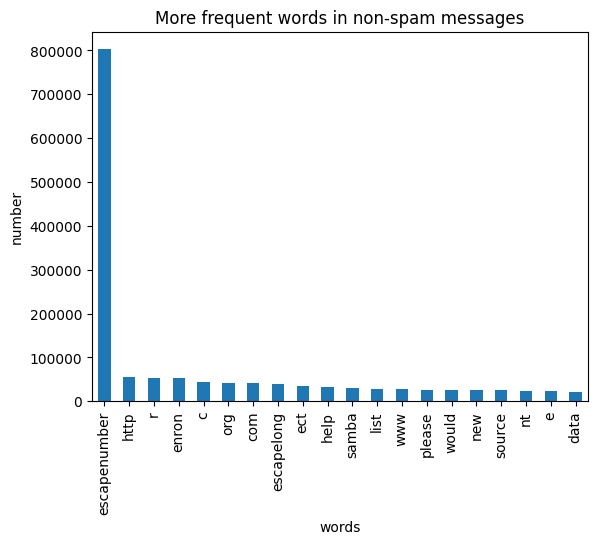

In [11]:

df_ham = pd.DataFrame(counter_ham)

df_ham = df_ham.rename(columns={0:"words in non-spam", 1:"count"})

df_ham.plot.bar(legend = False)
y_pos = np.arange(len(df_ham["words in non-spam"]))
plt.xticks(y_pos, df_ham["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

### Spam word analysis

In [12]:
spam = df[df['label'] == 1]
spam = spam['cleaned_message']
spam = " ".join(spam)
spam = spam.split()
counter_spam = Counter(spam).most_common(20)
counter_spam

[('escapenumber', 337455),
 ('escapelong', 188129),
 ('com', 29022),
 ('http', 27775),
 ('per', 26143),
 ('x', 23867),
 ('pills', 23128),
 ('escapenumbermg', 20541),
 ('price', 18724),
 ('company', 16223),
 ('one', 15953),
 ('save', 15007),
 ('may', 14672),
 ('item', 14473),
 ('e', 14084),
 ('us', 13828),
 ('time', 12358),
 ('please', 12333),
 ('get', 12000),
 ('new', 11402)]

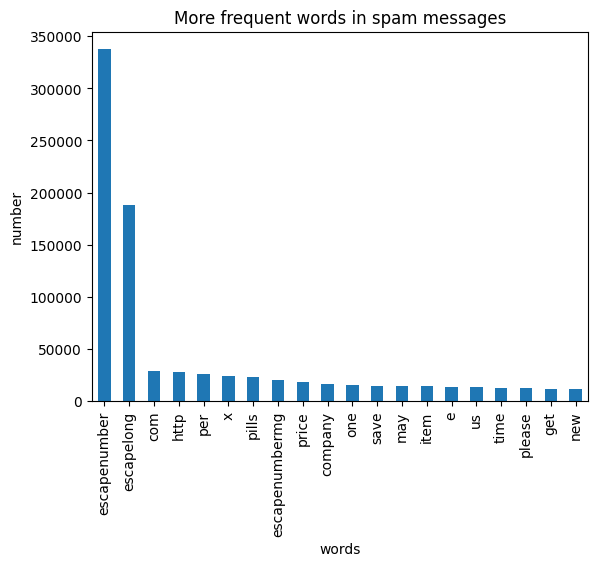

In [13]:

df_spam = pd.DataFrame(counter_spam)

df_spam = df_spam.rename(columns={0:"words in spam", 1:"count"})

df_spam.plot.bar(legend = False)
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

# Word Vectorization

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    stop_words=['escapenumber', 'escapelong'],
    max_df=0.9,      
    min_df=5,        
    ngram_range=(1,2),    
)

X = vectorizer.fit_transform(df['cleaned_message'])

In [16]:
vectorizer.get_feature_names_out()

array(['aa', 'aa aa', 'aa ab', ..., 'zzz gives', 'zzzz', 'zzzz example'],
      shape=(372014,), dtype=object)

# Train-test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Model Training

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [22]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9819652486518874
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7938
           1       0.99      0.97      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



# Classification Metrics

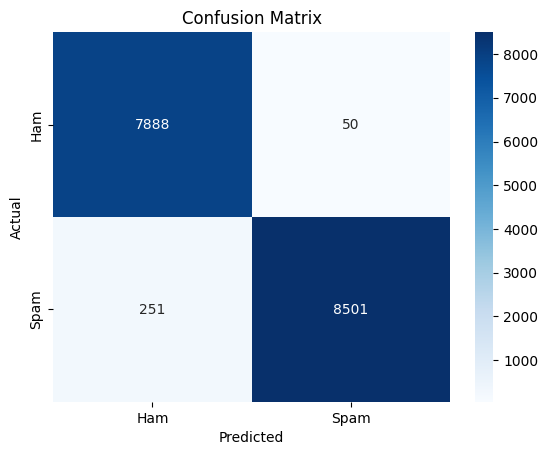

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [25]:
sample_emails = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now.",
    "Hey, can we reschedule our meeting to tomorrow?",
    "Get cheap meds online now, no prescription needed!",
    "Your invoice for the recent purchase is attached.",
    "Earn $$$ working from home, no experience required!"
]

# Preprocess just like training data
sample_emails_cleaned = [text.lower() for text in sample_emails]

# Transform using the same TF-IDF vectorizer
sample_vectors = vectorizer.transform(sample_emails_cleaned)

# Predict with your trained model
predictions = model.predict(sample_vectors)

# Print results
for email, pred in zip(sample_emails, predictions):
    label = "Spam" if pred == 1 else "Not Spam"
    print(f"📝 Email: {email}\n➡️ Prediction: {label}\n")

📝 Email: Congratulations! You've won a $1000 Walmart gift card. Click here to claim now.
➡️ Prediction: Spam

📝 Email: Hey, can we reschedule our meeting to tomorrow?
➡️ Prediction: Not Spam

📝 Email: Get cheap meds online now, no prescription needed!
➡️ Prediction: Spam

📝 Email: Your invoice for the recent purchase is attached.
➡️ Prediction: Not Spam

📝 Email: Earn $$$ working from home, no experience required!
➡️ Prediction: Spam



# Model Dump

In [26]:
import joblib
joblib.dump(model, "nb_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']